# Taller #4
##  Introducción al análisis frecuencial utilizando Python.
### Daniel Felipe Jaramillo Arenas, 201414139

In [18]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import pandas as pd
from scipy.integrate import odeint
from scipy.io.wavfile import read

Populating the interactive namespace from numpy and matplotlib


##### Introducción FFT (Fast Fourier Transform)

Para poder observar la implicación práctica de la FFT se usara como ejemplo la transformada de una función Gaussiana la cual se logra calcular analíticamente para poder comparar:
	
$f(x)=exp(-\alpha x^2)$

Su transformada es:

$\hat{f}(x)=\frac{1}{\sqrt{2\alpha}}exp(-\frac{k^2}{4\alpha})$

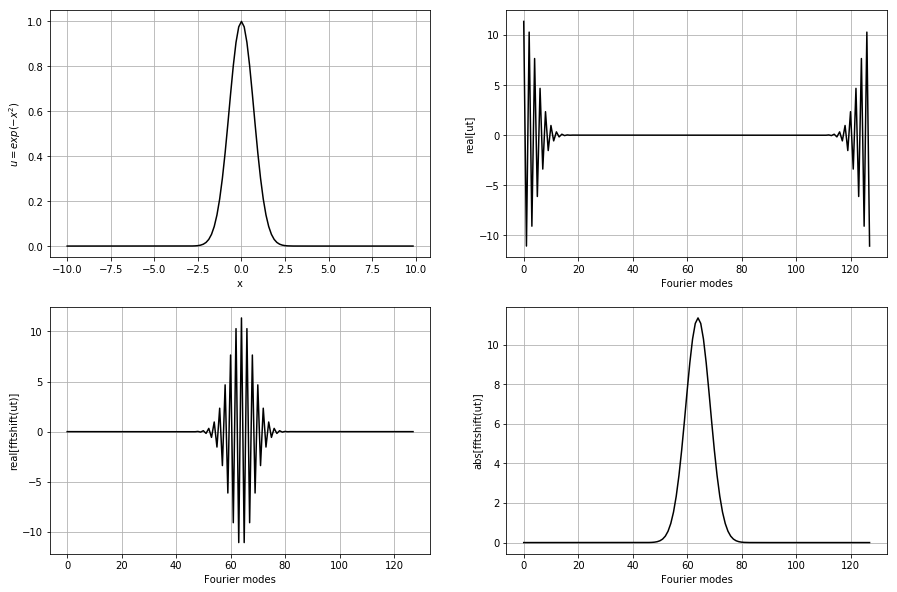

In [2]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=np.array(x2[0:n])
u=np.array(np.exp(-(x**2)))
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(x,u,'k')
plt.xlabel('x')
plt.ylabel('$u=exp(-x^2)$')
plt.grid()
plt.subplot(2,2,2)
plt.plot(real(ut),'k')
plt.xlabel('Fourier modes')
plt.ylabel('real[ut]')
plt.grid()
plt.subplot(2,2,3)
plt.plot(real(utshift),'k')
plt.xlabel('Fourier modes')
plt.ylabel('real[fftshift(ut)]')
plt.title('')
plt.grid()
plt.subplot(2,2,4)
plt.plot(np.abs(utshift),'k')
plt.xlabel('Fourier modes')
plt.ylabel('abs[fftshift(ut)]')
plt.grid()

##### FFT contra Diferencias Finitas

En el siguiente ejemplo se comparara el uso de las diferencias finitas y la FFT para el cálculo de derivadas. Para esto se utilizara la siguiente función:

$u(x)=sech(x)$

La cual tiene las siguientes relaciones:

$\frac{du}{dx}=-sech(x)tanh(x)$

$\frac{d^2u}{dx^2}=sech(x)-2sech^3(x)$

Text(0.5,0,'x')

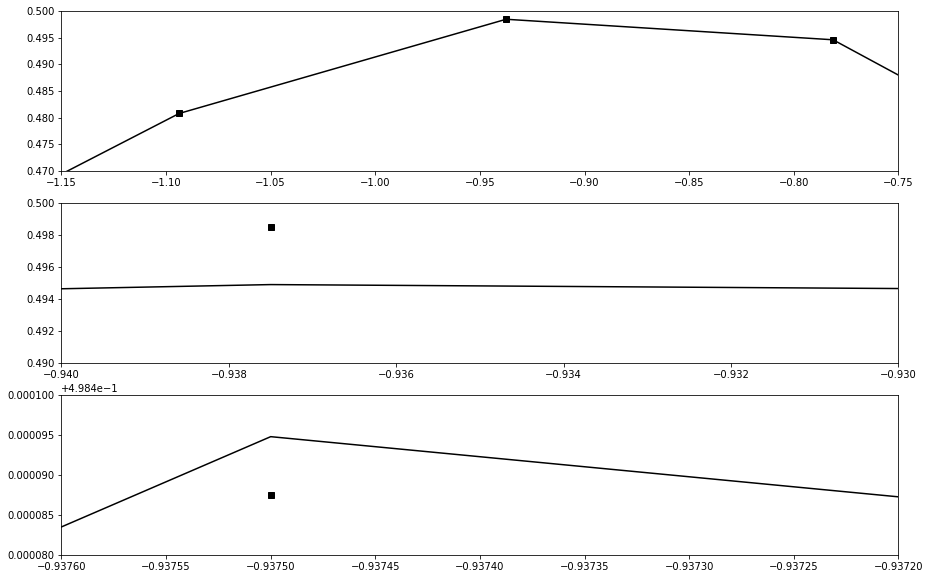

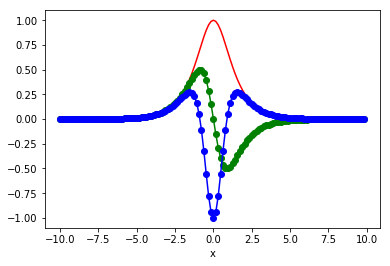

In [3]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=np.array(x2[0:n])
dx=x[1]-x[2]
u=1/np.cosh(x)
ut=np.fft.fft(u)
k1=(np.arange(0,(n/2)))*(2*np.pi/L)
k2=(np.arange((-n/2),0))*(2*np.pi/L)
k=np.concatenate((k1,k2))

# FFT
ut1=1j*k*ut
ut2=-(k**2)*ut
u1=real(np.fft.ifft(ut1))
u2=real(np.fft.ifft(ut2))
u1exact=-(1/np.cosh(x))*np.tanh(x)
u2exact=(1/np.cosh(x))-2*(1/np.cosh(x))**3

#Diferencias finitas

#de segundo orden
ux=[]
ux.append([(3*u[0]-4*u[1]+u[2])/(2*dx)])
for j in range(1,n-1):
    ux.append([(-u[j+1]+u[j-1])/(2*dx)])
ux.append([(-3*u[n-1]+4*u[n-2]-u[n-3])/(2*dx)])
uxx=np.array(ux)

#de cuarto orden
ux2=[]
ux2.append([(3*u[0]-4*u[1]+u[2])/(2*dx)])
ux2.append([(+3*u[1]-4*u[2]+u[3])/(2*dx)])
for j in range(2,n-2):
    ux2.append([(u[j+2]-8*u[j+1]+8*u[j-1]-u[j-2])/(12*dx)])
ux2.append([(-3*u[n-2]+4*u[n-3]-u[n-4])/(2*dx)])
ux2.append([(-3*u[n-1]+4*u[n-2]-u[n-3])/(2*dx)])
uxx2=np.array(ux2)


figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(x,u1exact,'ks',x,u1,'k')
plt.axis([-1.15,-0.75,0.47,0.5])
plt.subplot(3,1,2)
plt.plot(x,u1exact,'ks',x,uxx,'k')
plt.axis([-0.94,-0.93,0.49,0.50])
plt.subplot(3,1,3)
plt.plot(x,u1exact,'ks',x,uxx2,'k')
plt.axis([-0.9376,-0.9372,0.49848,0.49850])

figure()
plt.plot(x,u,'r')
plt.plot(x,u1,'g')
plt.plot(x,u1exact,'go')
plt.plot(x,u2,'b')
plt.plot(x,u2exact,'bo')
plt.xlabel('x')

#### FFT aplicado: Detección y filtrado de radar

Text(0.5,0,'t')

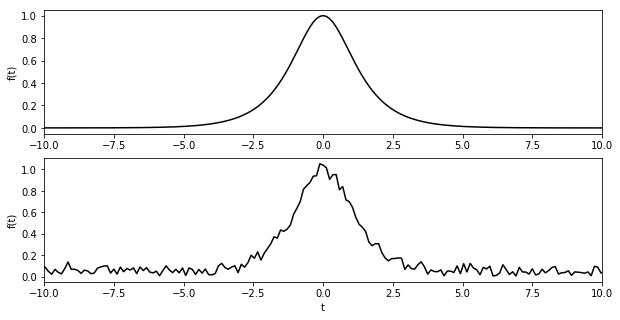

In [4]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=np.array(t2[0:n])
k1=(np.arange(0,(n/2)))*(2*np.pi/(2*L))
k2=(np.arange((-n/2),0))*(2*np.pi/(2*L))
k=np.concatenate((k1,k2))

u=1/np.cosh(t)
figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(t,u,'k')
plt.xlim(-10,10)
plt.ylabel('f(t)')

noise=1
ut=np.fft.fft(u)
utn1=ut+(noise*(np.random.randn(1,n)+1j*np.random.randn(1,n)))
utn=utn1[0,:]
un=np.fft.ifft(utn)
plt.subplot(2,1,2)
plt.plot(t,np.abs(un),'k')
plt.xlim(-10,10)
plt.ylabel('f(t)')
plt.xlabel('t')

Text(0.5,0,'wavenumber(k)')

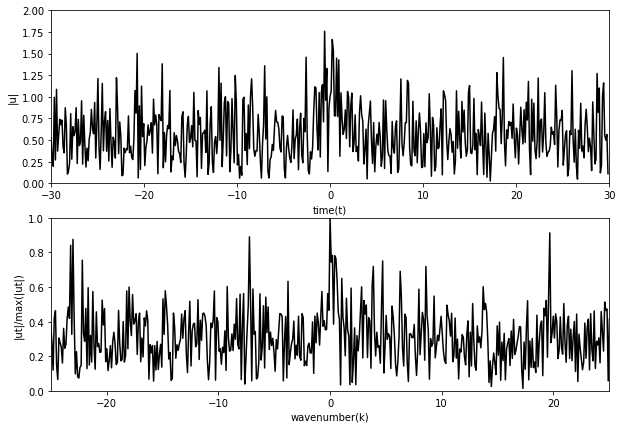

In [5]:
noise=10
ut=np.fft.fft(u)
utn1=ut+(noise*(np.random.randn(1,n)+1j*np.random.randn(1,n)))
utn=utn1[0,:]
un=np.fft.ifft(utn)
figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(t,np.abs(un),'k')
plt.axis([-30,30,0,2])
plt.ylabel('|u|')
plt.xlabel('time(t)')
plt.subplot(2,1,2)
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(utn))/np.max(np.abs(np.fft.fftshift(utn))),'k')
plt.axis([-25,25,0,1])
plt.ylabel('|ut|/max(|ut|)')
plt.xlabel('wavenumber(k)')

Text(0.5,0,'time(t)')

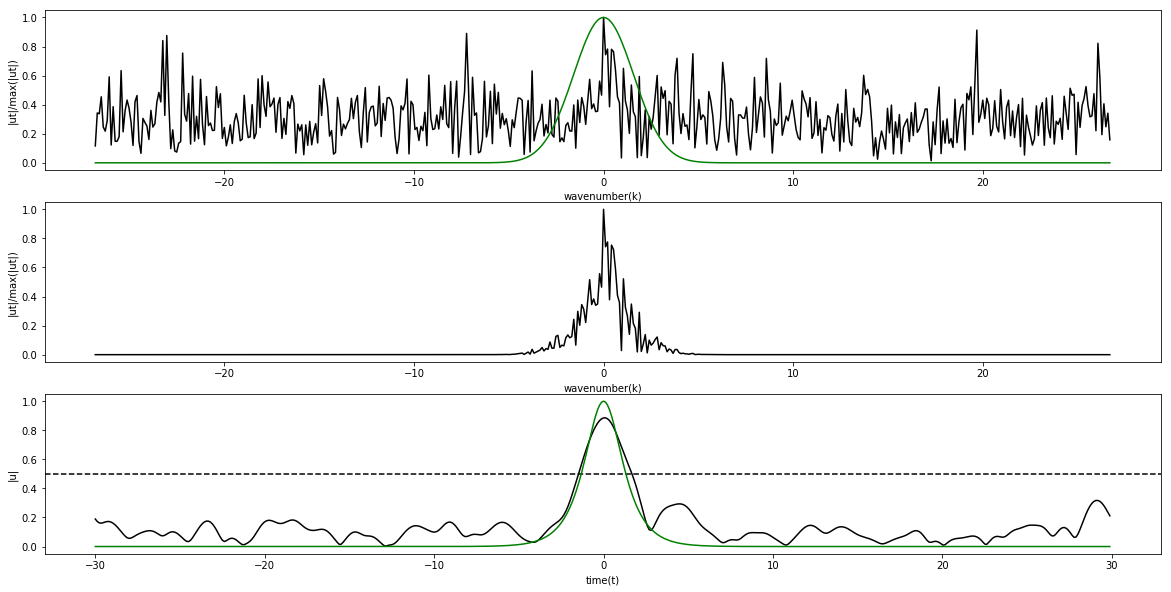

In [6]:
ffilter=np.exp(-0.2*(k)**2)
unft=ffilter*utn
unf=np.fft.ifft(unft)

figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(utn))/np.max(np.abs(np.fft.fftshift(utn))),'k')
plt.plot(np.fft.fftshift(k),np.fft.fftshift(ffilter),'g')
plt.ylabel('|ut|/max(|ut|)')
plt.xlabel('wavenumber(k)')
plt.subplot(3,1,2)
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unft))/np.max(np.abs(np.fft.fftshift(unft))),'k')
plt.ylabel('|ut|/max(|ut|)')
plt.xlabel('wavenumber(k)')
plt.subplot(3,1,3)
plt.plot(t,np.abs(unf),'k')
plt.axhline(y=0.5, color='k', linestyle='--')
plt.plot(t,u,'g')
plt.ylabel('|u|')
plt.xlabel('time(t)')

Text(0.5,0,'time(t)')

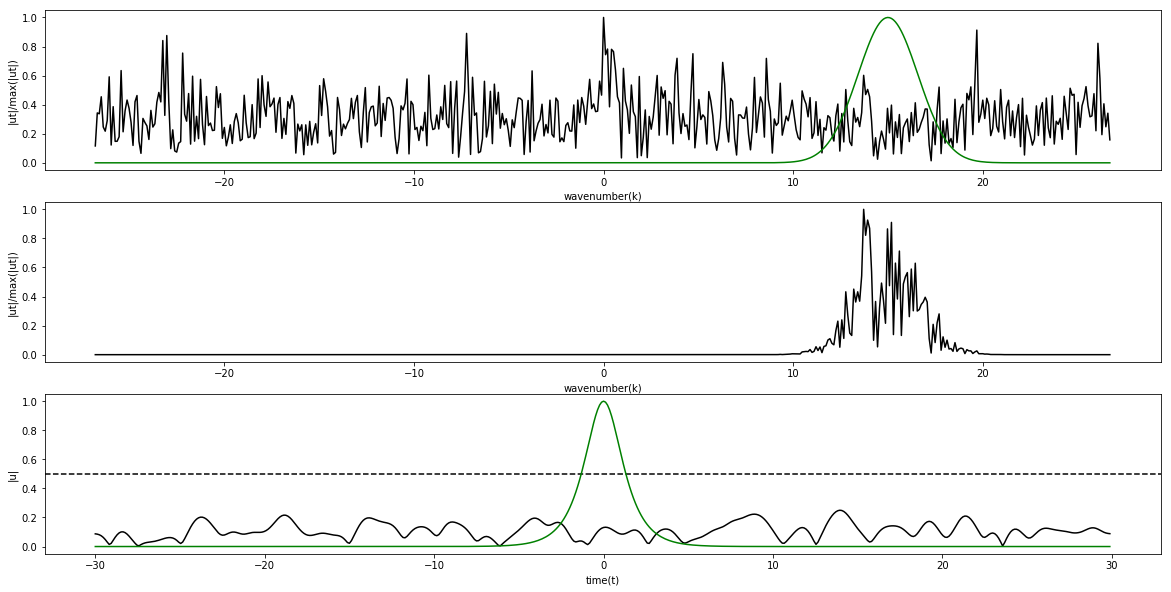

In [7]:
ffilter=np.exp(-0.2*(k-15)**2)
unft=ffilter*utn
unf=np.fft.ifft(unft)

figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(utn))/np.max(np.abs(np.fft.fftshift(utn))),'k')
plt.plot(np.fft.fftshift(k),np.fft.fftshift(ffilter),'g')
plt.ylabel('|ut|/max(|ut|)')
plt.xlabel('wavenumber(k)')
plt.subplot(3,1,2)
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unft))/np.max(np.abs(np.fft.fftshift(unft))),'k')
plt.ylabel('|ut|/max(|ut|)')
plt.xlabel('wavenumber(k)')
plt.subplot(3,1,3)
plt.plot(t,np.abs(unf),'k')
plt.axhline(y=0.5, color='k', linestyle='--')
plt.plot(t,u,'g')
plt.ylabel('|u|')
plt.xlabel('time(t)')

#### Aplicación: Detección y promedio de radar

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5,0,'k')

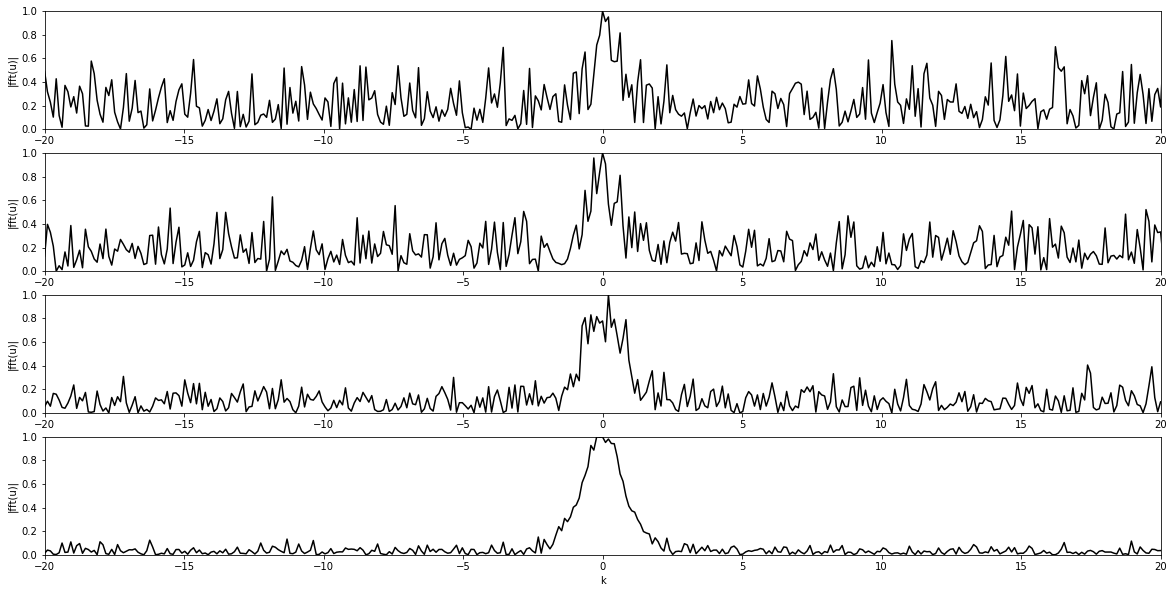

In [8]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=np.array(t2[0:n])
k1=(np.arange(0,(n/2)))*(2*np.pi/(2*L))
k2=(np.arange((-n/2),0))*(2*np.pi/(2*L))
k=np.concatenate((k1,k2))
ks=np.fft.fftshift(k)
noise=10

realize=[1,2,5,100]
figure(figsize=(20,10))
for jj in range(0,len(realize)):
    u=1/np.cosh(t)
    ave=np.zeros((1,n))
    utn=np.zeros((realize[jj],n))
    dat=np.zeros((realize[jj],n))
    un=np.zeros((realize[jj],n))
    ut=np.fft.fft(u)
    for j in range(0,realize[jj]):
        utn[j,:]=ut+(noise*(np.random.randn(1,n)+1j*np.random.randn(1,n)))
        ave=ave+utn[j,:]
        dat[j,:]=np.abs(np.fft.fftshift(utn[j][:]))/np.max(np.abs(utn[j][:]))
        un[j,:]= np.fft.ifft(utn[j][:])
    ave=np.abs(np.fft.fftshift(ave))/realize[jj]
    
    plt.subplot(4,1,jj+1)
    plt.plot(ks,ave[0,:]/np.max(ave),'k')
    plt.axis([-20,20,0,1])
    plt.ylabel('|fft(u)|')
plt.xlabel('k')  

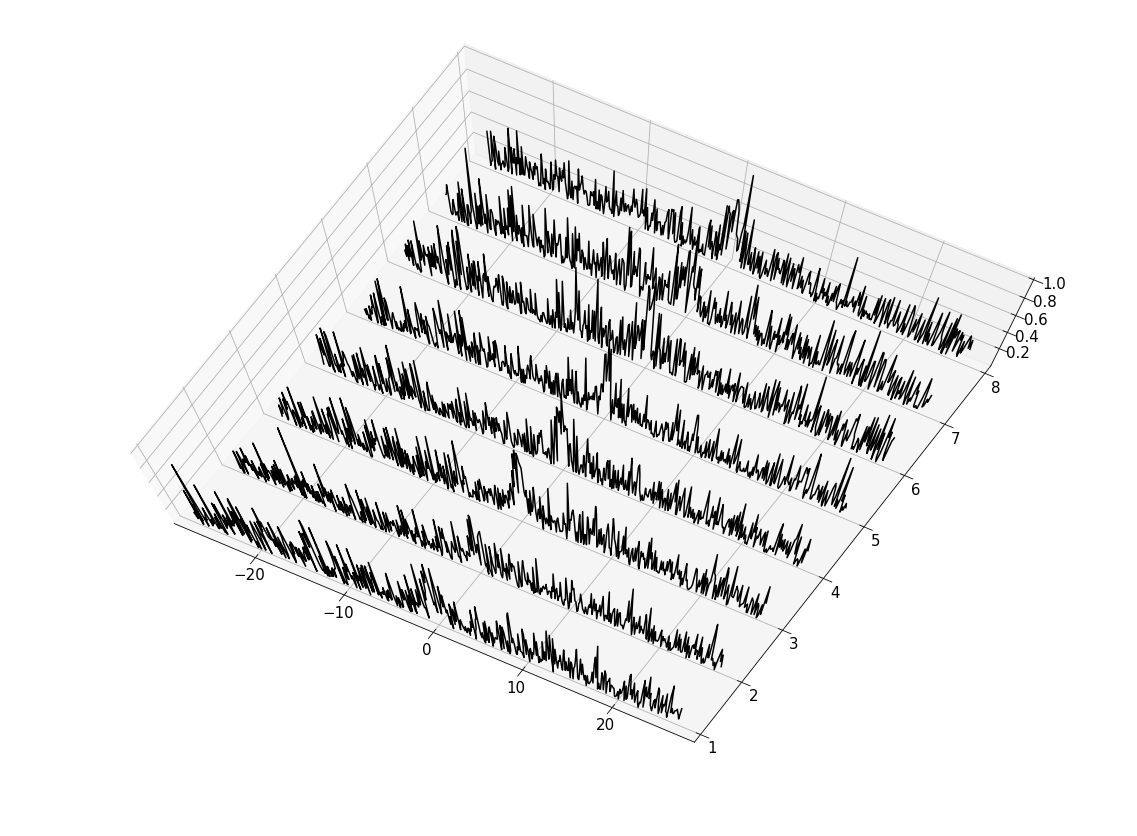

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig=figure(figsize=(20,15))
matplotlib.rcParams['font.size'] = 15
graf1=fig.gca(projection='3d')
graf1.axis([-28,28,1,8])
graf1.view_init(elev=80, azim=None)
for a in range(0,8):
    y=np.zeros(n)+(a+1)
    z=dat[a]
    graf1.plot(ks,y,z,'k')

### Ejemplo 
#### Cavitación

Uno de los principales problemas en una línea de bombeo es la presencia de cavitación en la bomba o en algunos accesorios de la línea como lo son las válvulas. La cavitación se puede reconocer por presencia de vibración o por el sonido que genera. Cuando el fenómeno se presenta en gran medida el sonido es evidente, pero cuando la cavitación está en su punto inicial puede que no sea detectable tan fácilmente debido  el ruido generado por los sistemas, sin embargo si genera los mismas consecuencias en los elementos como el desgaste de los materiales y la corrosión. Partiendo de esto, en este ejemplo se busca filtrar un audio de una bomba en funcionamiento con el fin de poder detectar si existe presencia de cavitación en el sistema.

El archivo de audio utilizado se obtuvo de la referencia [1] de este taller

In [10]:
data = read("Cav.wav")
data

(44100, array([0, 0, 0, ..., 0, 0, 0], dtype=int16))

Text(0.5,0,'t [s]')

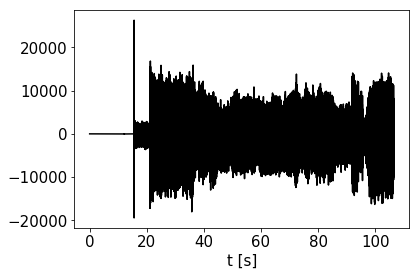

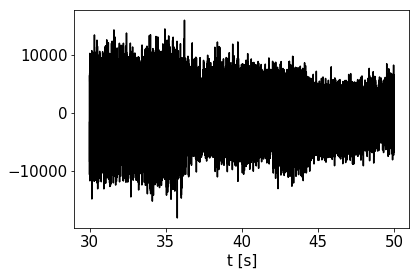

In [11]:
a=data[1].size
n=np.arange(0,a+1)
t=a/data[0]
t1=np.linspace(0,t,a)
plt.plot(t1,data[1],'k')
plt.xlabel('t [s]')
f=np.where(t1>=30)[0][0]
f2=np.where(t1>=50)[0][0]
data1=data[1][f:f2]
figure()
plt.plot(t1[f:f2],data1,'k')
plt.xlabel('t [s]')

Como se observa en la primera grafica el audio tiene una larga duración y para el propósito de este ejemplo se puede utilizar solo un fragmento por lo que para el ejemplo se utilizó el fragmento que se observa en la gráfica 2 que va desde los 30 segundos hasta el segundo 50 del audio original.

In [12]:
import IPython.display as ipd

El fragmento de audio sin ningún tipo de filtro es:

In [13]:
ipd.Audio(data1,rate=data[0])


En los ejemplos iniciales del taller se aplicó un filtro Gaussiano de pasa bajas para el propósito de este ejemplo también se utilizó un filtro Gaussiano pero de pasa alta. En la gráfica a continuación se puede observar las frecuencias que se eliminaron con el filtro:


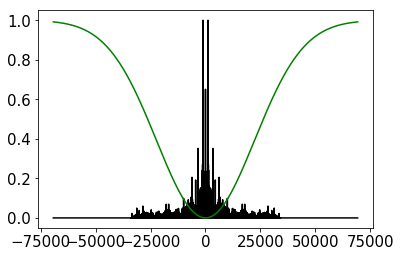

In [14]:
datat=np.fft.fft(data1)
L=t1[f:f2][-1]-t1[f:f2][0]
n=t1[f:f2].size
k1=(np.arange(0,(n/2)))*(2*np.pi/(2*L))
k2=(np.arange((-n/2),0))*(2*np.pi/(2*L))
k=np.concatenate((k1,k2))
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(datat))/np.max(np.abs(np.fft.fftshift(datat))),'k')

ffilter=1-np.exp(-1*10**-9*(k)**2)
plt.plot(np.fft.fftshift(k),np.fft.fftshift(ffilter),'g')

En las siguientes graficas se ilustra las frecuencias luego de aplicado el filtro y la gráfica del audio filtrado.

Text(0.5,0,'t [s]')

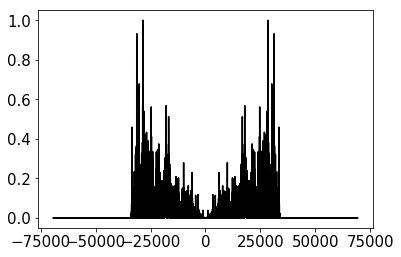

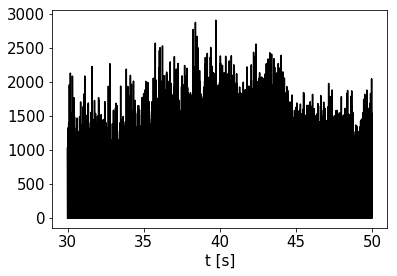

In [15]:
dataft=ffilter*datat
dataf=np.fft.ifft(dataft)
figure()
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(dataft))/np.max(np.abs(np.fft.fftshift(dataft))),'k')
figure()
plt.plot(t1[f:f2],np.abs(dataf),'k')
plt.xlabel('t [s]')

El resultado obtenido fue:

In [16]:
ipd.Audio(real(dataf),rate=data[0])

Como se puede escuchar en el último audio es mucho más fácil de asemejar la cavitación que en el audio inicial. Cabe aclarar que para el ejemplo el audio inicial utilizado la cavitación se podía identificar pero el hecho de haber podido mejorar el audio y tener como resultado una mayor claridad del fenómeno lleva a concluir que utilizarlo para filtrar audios donde la cavitación no sea tan fácil de encontrar podría ayudar a detectarla o si es el caso descartarla con seguridad, posiblemente se requiera de filtros más complejos o de una mayor investigación en el tema pero es un primer acercamiento.

#### Referencias

[1] 	C. Rueda, Cavitation in Hydraulic Pumps. [Grabación]. Youtube. 2010.